# HDB Regression Example

Construct regression models for HDB resale prices using the data in hdb1720.csv. \
This data was extracted from: https://data.gov.sg/dataset/resale-flat-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv('hdb_2017-2022.csv')
df

,month,Year*,Month*,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,2017,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,2017,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,2017,1,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,2017,1,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,2017,1,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121683,2022-03,2022,3,YISHUN,5 ROOM,501B,YISHUN ST 51,07 TO 09,112.0,Improved,2018,94 years 11 months,652000.0
121684,2022-03,2022,3,YISHUN,5 ROOM,820,YISHUN ST 81,07 TO 09,122.0,Improved,1988,65 years 06 months,585000.0
121685,2022-03,2022,3,YISHUN,EXECUTIVE,359,YISHUN RING RD,01 TO 03,145.0,Apartment,1988,65 years 05 months,682000.0
121686,2022-03,2022,3,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,65 years 04 months,720000.0


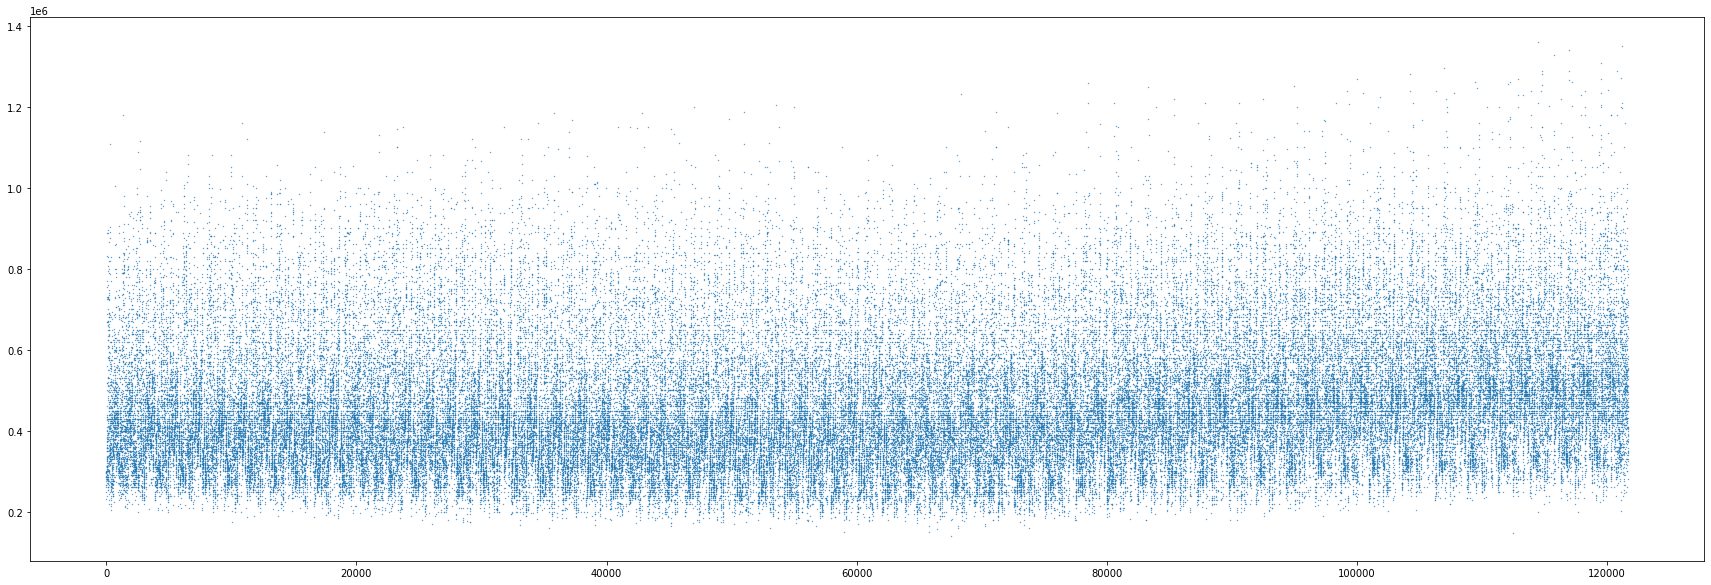

In [3]:
plt.figure(figsize=(30,10))
plt.scatter(df.index, df['resale_price'], s=0.1)
plt.show()

In [4]:
df.shape

(121688, 13)

In [5]:
df_trim = df.drop(['block', 'street_name', 'remaining_lease'], axis=1)
df_trim

,month,Year*,Month*,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2017-01,2017,1,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0
1,2017-01,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0
2,2017-01,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0
3,2017-01,2017,1,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0
4,2017-01,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0
...,...,...,...,...,...,...,...,...,...,...
121683,2022-03,2022,3,YISHUN,5 ROOM,07 TO 09,112.0,Improved,2018,652000.0
121684,2022-03,2022,3,YISHUN,5 ROOM,07 TO 09,122.0,Improved,1988,585000.0
121685,2022-03,2022,3,YISHUN,EXECUTIVE,01 TO 03,145.0,Apartment,1988,682000.0
121686,2022-03,2022,3,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,1988,720000.0


In [6]:
df_trim.dtypes

month                   object
Year*                    int64
Month*                   int64
town                    object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

## Non-numerical Data Types:
- month
- town
- flat_type
- storey_range
- flat_model

## Preparing X and y data for regression

In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

pipeline = ColumnTransformer([
    ('o', OrdinalEncoder(), ['month', 'flat_type', 'storey_range']),
    ('n', OneHotEncoder(), ['town', 'flat_model']),
], remainder='passthrough')

X = pipeline.fit_transform(df_trim.drop(['resale_price'], axis=1))
y = df_trim['resale_price']

In [13]:
df_trim.columns

Index(['month', 'Year*', 'Month*', 'town', 'flat_type', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [24]:
sorted(df_trim['lease_commence_date'].unique())

[1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [12]:
X.toarray()[0]

array([   0.,    1.,    3.,    1.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0., 2017.,    1.,   44., 1979.])

## View the OrdinalEncoded values

In [51]:
encoder = OrdinalEncoder()
encoder.fit_transform(df[['storey_range']])
categories = encoder.categories_
for i, label in enumerate(categories[0]): print(f'{label} :: {i}')

01 TO 03 :: 0
04 TO 06 :: 1
07 TO 09 :: 2
10 TO 12 :: 3
13 TO 15 :: 4
16 TO 18 :: 5
19 TO 21 :: 6
22 TO 24 :: 7
25 TO 27 :: 8
28 TO 30 :: 9
31 TO 33 :: 10
34 TO 36 :: 11
37 TO 39 :: 12
40 TO 42 :: 13
43 TO 45 :: 14
46 TO 48 :: 15
49 TO 51 :: 16


## View the transformed data of the first transaction

In [60]:
X.toarray()[0]

array([   0.,    1.,    3.,    1.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,   44., 1979.])

## View the OneHotEncoded values

In [67]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['town', 'flat_model']])
categories = ohe.categories_
for i, category in enumerate(categories):
    print(f'\nCategory: {ohe.feature_names_in_[i]} ({len(category)})\n---')
    for j, label in enumerate(category):
        print(f'{label} :: {j}')


Category: town (26)
---
ANG MO KIO :: 0
BEDOK :: 1
BISHAN :: 2
BUKIT BATOK :: 3
BUKIT MERAH :: 4
BUKIT PANJANG :: 5
BUKIT TIMAH :: 6
CENTRAL AREA :: 7
CHOA CHU KANG :: 8
CLEMENTI :: 9
GEYLANG :: 10
HOUGANG :: 11
JURONG EAST :: 12
JURONG WEST :: 13
KALLANG/WHAMPOA :: 14
MARINE PARADE :: 15
PASIR RIS :: 16
PUNGGOL :: 17
QUEENSTOWN :: 18
SEMBAWANG :: 19
SENGKANG :: 20
SERANGOON :: 21
TAMPINES :: 22
TOA PAYOH :: 23
WOODLANDS :: 24
YISHUN :: 25

Category: flat_model (20)
---
2-room :: 0
Adjoined flat :: 1
Apartment :: 2
DBSS :: 3
Improved :: 4
Improved-Maisonette :: 5
Maisonette :: 6
Model A :: 7
Model A-Maisonette :: 8
Model A2 :: 9
Multi Generation :: 10
New Generation :: 11
Premium Apartment :: 12
Premium Apartment Loft :: 13
Premium Maisonette :: 14
Simplified :: 15
Standard :: 16
Terrace :: 17
Type S1 :: 18
Type S2 :: 19


## Data Field Correspondence

- [0] month: numerical
- [1] flat_type: numerical
- [2] storey_range: numerical
- [3-28] town: binary
- [29-48] flat_model: binary
- [49] floor_area_sqm: numerical
- [50] lease_commence_date: numerical

In [68]:
X.toarray()[1]

array([   0.,    2.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,   67., 1978.])

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
print(f'Intercept (B0): {lr.intercept_}')
print(f'Coefficient (B1): \n{lr.coef_}')
print(f'R^2 of model: {lr.score(X, y)}')

Intercept (B0): -9577952.009012854
Coefficient (B1): 
[    326.59537161   17973.29453254   13425.47823987   18276.01536065
   11042.85004339  121650.52350534  -62852.47244523  133938.704547
 -109474.46367999  226347.35003895  132614.22722065 -151162.95938565
   56112.76925675   66206.01437069  -57935.44698498  -48088.87928325
 -110353.65296244   78509.70940465  177584.06972247  -77526.20169835
 -100140.43917893  145316.36158911 -168213.2581382  -121104.99132721
   23699.81659523  -20403.43697419   72428.07763527 -142625.0441559
  -93845.24307594  -57678.80525319  -30175.39789934  -61440.43594795
   47471.90766126  -87966.49093927  112370.79803478  -26639.95950966
  -86444.68612587   35792.59871168  -82091.31494713   23953.71600726
  -66957.44177319  -75675.72854943   32998.94199702  -41147.89176009
  -66811.73169182  -80344.25106872  270220.92606898   98274.042924
  142291.20406058    3671.85330501    4858.25365193]
R^2 of model: 0.8638047847259241


## Support Vector Regression (VERY slow)

In [71]:
from sklearn.svm import LinearSVR

svmr = LinearSVR(epsilon=0, C=100, max_iter=1_000_000, random_state=0).fit(X, y)
print(f'Intercept (B0): {svmr.intercept_}')
print(f'Coefficient (B1): \n{svmr.coef_}')
print(f'R^2 of model: {svmr.score(X, y)}')

Intercept (B0): [-16277.9295847]
Coefficient (B1): 
[   572.77019583  57891.07081092  18651.54277856   4541.57386408
    951.28368802  98800.75766558 -38877.32924143  88638.27795513
 -45431.93993642  28300.          55215.28484941 -87267.66806158
  31978.785737    21716.36726572 -25268.50347142 -18408.60109596
 -64749.47988959  46578.01203667  44924.64549267 -29273.40336785
  -1037.75999658  83085.87365952 -83678.88315682 -43265.85070493
  18378.4092075    3406.24695002  24546.37402913 -84154.63182904
 -45925.77123352    300.           5628.12855376 -10947.3019999
 138448.40916089 -44637.27429042   1600.          16846.03874377
 -10148.95155652   9790.93558355 -24909.06941093   3800.
 -39387.80046665    846.85072976   6300.            300.
 -39983.37466612 -63724.51996595   6300.          17500.
   9800.           1891.28019149     32.96147496]
R^2 of model: 0.7511635506803505


## Decision Tree Regression

In [105]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=12, min_samples_leaf=1, random_state=0).fit(X, y)
print(f'R^2 of model: {dtr.score(X, y)}')

R^2 of model: 0.8498332022304591


## Estimating Resale Price
Unit: Punggol, 5-Room, Level 25, 80 sqm, Standard flat whose lease started on 2001 and is selling on March 2017

In [77]:
unit = np.zeros(51)
unit[0] = 2 # set month to Mar 2017
unit[1] = 4 # set flat type to 5-Room
unit[2] = 8 # set storey range to 25
unit[20] = 1 # set town to Punggol
unit[45] = 1 # set flat model to Standard
unit[49] = 80 # set floor area to 80 sqm
unit[50] = 2001 # set lease commencement to 2001
print(unit)

print(f'Estimated resale price (Linear regression): ${lr.predict([unit])[0]:,.2f}')
print(f'Estimated resale price (SVM regression): ${svmr.predict([unit])[0]:,.2f}')
print(f'Estimated resale price (DT regression): ${dtr.predict([unit])[0]:,.2f}')

[   2.    4.    8.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.
    0.   80. 2001.]
Estimated resale price (Linear regression): $436,627.32
Estimated resale price (SVM regression): $518,140.28
Estimated resale price (DT regression): $657,120.89


# Model Validation

## Convert X and y into a Pandas DataFrame

In [96]:
col_name = [
    'month','type','storey','AMK','BED','BIS','BBT','BMH','BPJ',
    'BTM','CEN','CCK','CLE','GEY','HOU','JRE','JRW','KAL','MAR',
    'PAS','PUN','QUE','SEM','SKG','SER','TAM','TOA','WOO',
    'YIS','2-room','Adjoined','Apartment','DBSS','Improved',
    'Improved-M','Maisonette','Model A','Model A-M','Model A2',
    'Multi Gen','New Gen','Premium Apt','Premium Apt Loft',
    'Premium M','Simplified','Standard','Terrace','Type S1',
    'Type S2','Area','Lease'
]

df_X = pd.DataFrame(X.toarray(), columns=col_name)
df_Xy = df_X.assign(resale_price=y)
df_Xy

,month,type,storey,AMK,BED,BIS,BBT,BMH,BPJ,BTM,...,Premium Apt Loft,Premium M,Simplified,Standard,Terrace,Type S1,Type S2,Area,Lease,resale_price
0,0.0000,1.0000,3.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,44.0000,1979.0000,232000.0000
1,0.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,67.0000,1978.0000,250000.0000
2,0.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,67.0000,1980.0000,262000.0000
3,0.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,68.0000,1980.0000,265000.0000
4,0.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,67.0000,1980.0000,265000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101646,54.0000,3.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,84.0000,1985.0000,380000.0000
101647,54.0000,3.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,84.0000,1987.0000,357000.0000
101648,54.0000,3.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,103.0000,1988.0000,460000.0000
101649,54.0000,4.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,121.0000,1985.0000,498000.0000


## Extract train and test data

In [97]:
df_test = df_Xy[df_Xy.month == 12]
X_test = df_test.drop(['resale_price'], axis=1)
y_test = df_test.resale_price

df_train = df_Xy[(df_Xy.month >= 0) & (df_Xy.month <= 11)]
X_train = df_train.drop(['resale_price'], axis=1)
y_train = df_train.resale_price

## Perform linear regression using train data and evaluate using test data

In [102]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'R^2 of model: {lr.score(X_train, y_train):.3f}')

pred = lr.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, pred, squared=False):.2f}')
print(f'R^2 of predictions: {r2_score(y_test, pred):.3f}')

R^2 of model: 0.868
RMSE: 56846.94
R^2 of predictions: 0.868


## Perform support vector regression using train data and evaluate using test data

In [104]:
svmr = LinearSVR(epsilon=0, C=100, max_iter=1_000_000, random_state=0).fit(X_train, y_train)
print(f'R^2 of model: {svmr.score(X_train, y_train):.3f}')

pred = svmr.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, pred, squared=False):.2f}')
print(f'R^2 of predictions: {r2_score(y_test, pred):.3f}')

R^2 of model: 0.654
RMSE: 92994.64
R^2 of predictions: 0.647


## Perform decision tree regression using train data and evaluate using test data

In [107]:
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=12, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
print(f'R^2 of model: {dtr.score(X_train, y_train):.3f}')

pred = dtr.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, pred, squared=False):.2f}')
print(f'R^2 of predictions: {r2_score(y_test, pred):.3f}')

R^2 of model: 0.855
RMSE: 65046.76
R^2 of predictions: 0.827
